# 准备数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=10000,noise=0.4,random_state=42)

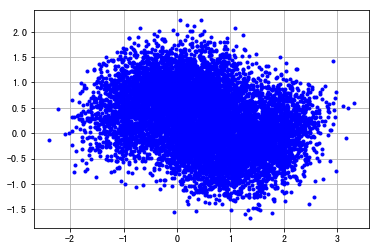

In [3]:
plt.plot(X[:,0],X[:,1],'b.')
plt.grid()
plt.show()

# 数据分割

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
X_train.shape

(8000, 2)

# 网格搜索/交叉验证

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier()

In [7]:
param_grid={
    'max_leaf_nodes':[i for i in range(15,25)],
    'min_samples_split':[2,3,4]
}
tree_clf_grid_search=GridSearchCV(tree_clf,param_grid,cv=5,verbose=2,n_jobs=-1)

In [8]:
tree_clf_grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_leaf_nodes': [15, 16, 17, 18, 19, 20, 21, 22, 23,
                                            24],
                         'min_samples_split': [2, 3, 4]},
             verbose=2)

In [9]:
tree_clf_grid_search.best_params_

{'max_leaf_nodes': 23, 'min_samples_split': 2}

# 模型训练

In [10]:
tree_clf_grid_search.best_estimator_.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=23)

In [11]:
y_pred=tree_clf_grid_search.best_estimator_.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8735

# 模拟随机森林

In [13]:
from sklearn.model_selection import ShuffleSplit
# 随机打乱抽样
n_trees=1000
n_instances=100

mini_sets=[]

In [14]:
rs=ShuffleSplit(n_splits=n_trees,test_size=len(X_train)-n_instances,random_state=42)
for mini_train_index,mini_test_index in rs.split(X_train):
    X_mini_train=X[mini_train_index]
    y_mini_train=y[mini_train_index]
    # 只要训练集部分，不要测试集
    mini_sets.append((X_mini_train, y_mini_train))

In [15]:
from sklearn.base import clone
forest=[clone(tree_clf_grid_search.best_estimator_) for _ in range(n_trees)]

In [16]:
accuracy_scores=[]
for tree,(X_mini_train,y_mini_train) in zip(forest,mini_sets):
    tree.fit(X_mini_train,y_mini_train)
    y_pred=tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    
np.mean(accuracy_scores)

0.8010105

In [17]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [18]:
Y_pred

array([[1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)# 高数投票

In [21]:
y_pred_majority_votes,n_votes

(array([[1, 1, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[924, 911, 944, ..., 931, 983, 596]]))

In [22]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.8765